In [ ]:
from pandas import DataFrame, read_csv
from numpy import array_split, ceil
from glob import glob
from json import load

# cut_midas_taxonomy = load("cut_midas_taxonomy.json")
alignment_jsons = glob("alignments/*.json")
num_entries = 500
num_batches = ceil(len(alignment_jsons)/num_entries)
for i, files in enumerate(array_split(alignment_jsons, num_batches)):
    total_json = {}
    for file in files:
        with open(file) as f:
            # scores = load(f)
            # new_scores = {}
            # for 
            total_json.update(load(f))
            # for ID, matches in data.items():
            #     for seq, score in matches.items():
    # if i == 5:  break
    df = DataFrame(data=total_json)
    if len(df.columns) != num_entries:
        entries = set([x.split("/")[-1].replace(".json", "") for x in files])
        missing_entries = set(df.columns).symmetric_difference(entries)
        print(f"The {i}th batch ({len(df.columns)}) columns versus {num_entries} is missing the following entries: {missing_entries}")
    df.index.name = "sequence"
    df.to_csv(f"alignments/all_v_all_alignments{i}.csv")
    print(i, end="\r")
    # break

# display(df.head())


The 0th batch (498) columns versus 500 is missing the following entries: set()
The 1th batch (498) columns versus 500 is missing the following entries: set()
The 2th batch (498) columns versus 500 is missing the following entries: set()
The 3th batch (498) columns versus 500 is missing the following entries: set()
The 4th batch (498) columns versus 500 is missing the following entries: set()
The 5th batch (498) columns versus 500 is missing the following entries: set()
The 6th batch (498) columns versus 500 is missing the following entries: set()
The 7th batch (498) columns versus 500 is missing the following entries: set()
The 8th batch (498) columns versus 500 is missing the following entries: set()
The 9th batch (498) columns versus 500 is missing the following entries: set()
The 10th batch (498) columns versus 500 is missing the following entries: set()
The 11th batch (498) columns versus 500 is missing the following entries: set()
The 12th batch (498) columns versus 500 is missing

ValueError: number sections must be larger than 0.

In [10]:
alignment_csvs = glob("alignments/all_v_all_alignments*.csv")
print(len(alignment_csvs))
num_files_simultaneously = 5
num_batches = ceil(len(alignment_csvs)/num_files_simultaneously)
for I, csvs in enumerate(array_split(alignment_csvs, num_batches)):
    df = read_csv(csvs[0]).set_index("sequence")
    for csv in csvs[1:]:
        new_df = read_csv(csv).set_index("sequence")
        df = df.join(new_df)
    df.to_csv(f"alignments/all_v_all__{I}.csv")
    # break

20


In [11]:
alignment_csvs = glob("alignments/all_v_all__*.csv")
print(len(alignment_csvs))
df = read_csv(alignment_csvs[0]).set_index("sequence")
for csv in alignment_csvs[1:]:
    new_df = read_csv(csv).set_index("sequence")
    df = df.join(new_df)
df.to_csv(f"alignments/all_v_all_alignments.csv")
    # break

4


In [16]:
display(df.head())

display(df.shape)

from Bio import SeqIO
import json
print(len(list(SeqIO.parse("code_sequence_5.16.fa.fasta", "fasta"))))
print(len(json.load(open("cut_midas_taxonomy.json", "r"))))

,3d4d0abe98096fcaed17decc09dc6c4c,2d8d5004dc994f9afa3a48bc723b650b,f8c9c4f42f6641d5e0f5b67ff8bb8964,957b8233c0cbc03c32413da7114d500e,4fa86fad10569d967e171843206742c4,13a64a12959741e1ec2e9590a8693391,8466c6dfab56e8746ea47bc3c0e571e0,75684db37a815fbf97b5e847e11dbc73,3650c400f224650eba1d59c8807f6a87,6c7cc25ccfb317886a6628773d347cde,...,b2f5f7bc040d7a596b4014f46f888d6c,70e46338ba5623f7e8a9955c741f4c4b,872e13dbf301a9540ef3ed2792c063ce,48a3247653308c6015d308fb05fee544,de466fe1506162725f86228b26a130c0,5313a460934f51b9af6019824504178c,48a7ab8e593ebe5f41034be027c6be7e,25ebb445f83e61423a85a00a877e071c,ee06df355dbbfb9569e33b9e88558664,345d5ab1fe0a8fb8e2a2e11058fe5594
sequence,,,,,,,,,,,,,,,,,,,,,
AACGTAGGTGGCGAGCGTTATCCGGATTTACTGGGCGTAAAGAGCGCGTAGGTGGTTGAGTAAGTTGGATGTAAAATCTCTTGGCTTAACTGGGAGGAGACGTTCAAGACTGCTTGGCTTGAGGGCGAGAGAGGGGTGCAGAATTCCCGGTGTAGTGGTGGAATGCGTAGATATCGGGAGGAATACCAGTGGCGAAAGCGGCGCCCTGGCTCGCAACTGACACTGAGGCGCGAAAGCGTGGGTAGCGAACGGGATTAGATACCCCGGTAGTCCACGCTGTAAACGATGTGAACTGGGTGTTGGCGGTATGAATTCCGTCGGTGCCGTAGCAAACGCGATAAGTTCACCGCCTGGGGAGTACGGTCGCAAGGCTA,0.709893,0.816845,0.739305,0.687166,0.819519,0.672460,0.782086,0.691176,0.743316,0.763369,...,0.675134,0.695187,0.651070,0.709893,0.754011,0.748663,0.783422,0.788770,0.740642,0.679144
NaN,-45.375000,-46.375000,-46.250000,-46.000000,-46.250000,-45.625000,-46.375000,-45.875000,-46.500000,-46.375000,...,-46.000000,-46.250000,-45.875000,-46.125000,-46.375000,-48.625000,-46.375000,-46.375000,-46.375000,-46.375000
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTCCTTAAGTCTGATGTGAAAGCCCACGGCTTAACCGTGGAAGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGACTCTCTGGTCTGTAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTAAGTGTTGGAGGGTTTCCACCCTTCAGTGCTGCAGCTAACGCATTAAGCACTCCGCCTGGGGAGTACGGCCGCAAGGCTG,0.720588,0.802139,0.788770,0.692513,0.763369,0.707219,0.759358,0.727273,0.796791,0.740642,...,0.679144,0.729947,0.719251,0.708556,0.807487,0.766043,0.815508,0.794118,0.780749,0.692513
TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTTGTAGGCGGTTTGTCGCGTCTGCAGTGAAAATCCGGGGCTCAACCCCGGACTTGCTGTGGGTACGGGCAGACTAGAGTGTGGTAGGGGAGACCGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCCACAACTGACGCTGAGAAGCGAAAGCATGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGTTGGGCGCTAGGTGTGGGGCTCATTCCACGAGCTCCGTGCCGCAGCTAACGCATTAAGCGCCCCGCCTGGGGAGTACGGCCGCAAGGCTA,0.701333,0.754667,0.744000,0.693333,0.722667,0.680000,0.724000,0.666667,0.912000,0.709333,...,0.704000,0.689333,0.713333,0.698667,0.744000,0.754667,0.778667,0.717333,0.736000,0.673333
TACGGAGGGTGCAAGCGTTATCCGGAATCACTGGGTTTAAAGGGTGCGTAGGCGGCTTAGTAAGTCAGTGGTGAAAGGCTGTGGCTTAACCATGGAATTGCCATTGATACTGCTGAGCTTGAATGAGGTTGAGGTTGGCGGAATGTGACATGTAGCGGTGAAATGCTTAGATATGTCATGGAACACCGATTGCGAAGGCAGCTGACTGGACCTATATTGACGCTGAGGCACGAAAGCGTGGGTAGCGAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGATGCTTACTCGTTGTTTGATCGAAAGATTGAGTGACTAAGCGAAAGCGATAAGTAAGCCACCTGGGGAGTACGACCGCAAGGTTG,0.693243,0.701351,0.741892,0.664865,0.677027,0.808108,0.756757,0.797297,0.709459,0.678378,...,0.689189,0.795946,0.772973,0.706757,0.729730,0.737838,0.733784,0.695946,0.722973,0.695946


(31433, 9959)

9959
31433


# determine the number of sequences per 16S at various identity thresholds

## parse and evaluate the distribution of matches at each threshold

In [7]:
from pandas import read_csv
alignments_df = read_csv("all_v_all_alignments.csv").set_index("sequence")

In [8]:
import numpy as np
import json

matches = {}
for identity_threshold in np.flip(np.arange(0.9, 1.01, 0.01)):
    thresh = round(identity_threshold, 2)
    matches[thresh] = {}
    for col in alignments_df.columns:
        entries = list(alignments_df[alignments_df[col] >= thresh].index)
        if len(entries) == 0: continue
        matches[thresh][col] = entries
    
json.dump(matches, open("matches.json", "w"), indent=3)


MAG_matches = {}
for col in alignments_df.columns:
    MAG_matches[col] = {}
    for identity_threshold in np.flip(np.arange(0.9, 1.01, 0.01)):
        thresh = round(identity_threshold, 2)
        entries = list(alignments_df[alignments_df[col] >= thresh].index)
        if len(entries) == 0: continue
        MAG_matches[col][thresh] = entries

json.dump(MAG_matches, open("MAG_matches.json", "w"), indent=3)

In [9]:
import json
MAG_matches = json.load(open("MAG_matches.json", "r"))
list(MAG_matches.items())[:3]

[('3d4d0abe98096fcaed17decc09dc6c4c', {}),
 ('2d8d5004dc994f9afa3a48bc723b650b',
  {'1.0': ['TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCCCGCAGGCGGCTTGGCAAGTTTCGAGTGAAATCTCCCGGCTCAACTGGGAGGGCGCTCGGAAAACTGCCAGGCTTGAGGCAGGGAGAGGGATGTGGAATTCCCGGTGTAGTGGTGAAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCATCCTGGCCCTGTCCTGACGCTCAGGGGCGAAAGCGTGGGGAGCAAACCGGATTAGATACCCGGGTAGTCCACGCCGTAAACGATGAGTACTAGGTGTAGGGGGTATCGACCCCCTCTGTGCCGAAGCTAACGCGATAAGTACTCCGCCTGGGGACTACGGCCGCAAGGCTA'],
   '0.99': ['TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCCCGCAGGCGGCTTGGCAAGTTTCGAGTGAAATCTCCCGGCTCAACTGGGAGGGCGCTCGGAAAACTGCCAGGCTTGAGGCAGGGAGAGGGATGTGGAATTCCCGGTGTAGTGGTGAAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCATCCTGGCCCTGTCCTGACGCTCAGGGGCGAAAGCGTGGGGAGCAAACCGGATTAGATACCCGGGTAGTCCACGCCGTAAACGATGAGTACTAGGTGTAGGGGGTATCGACCCCCTCTGTGCCGAAGCTAACGCGATAAGTACTCCGCCTGGGGACTACGGCCGCAAGGCTA'],
   '0.98': ['TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCCCGCAGGCGGCTTGGCAAGTTTCGAGTGAAATCTCCCGGCTCAACTGGGAGGGCGCTCGGAAAACTGCCAGGCTTGAGGC

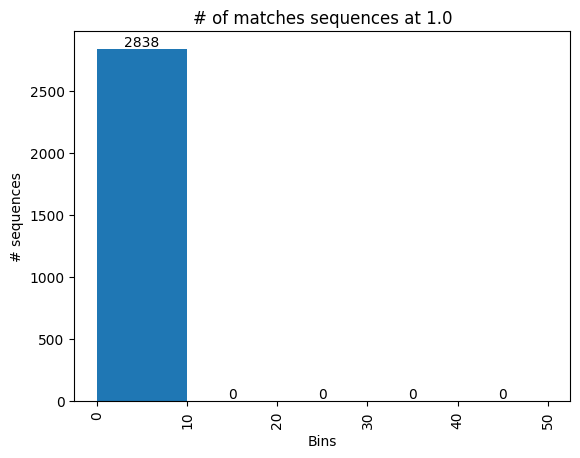

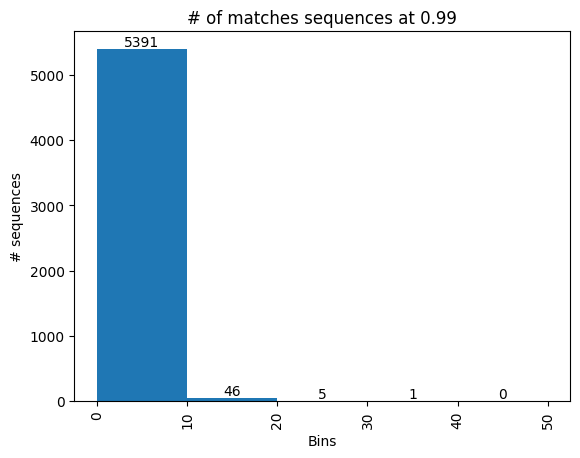

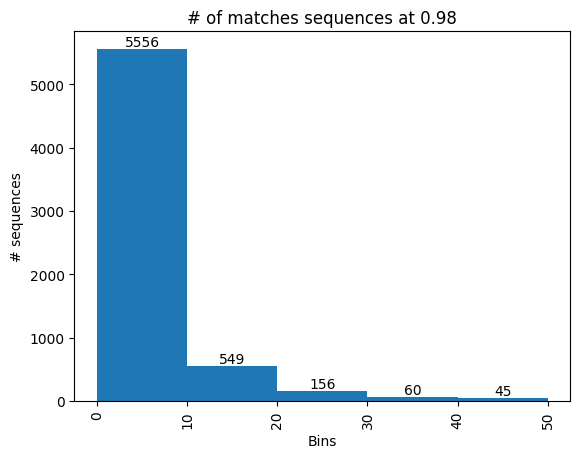

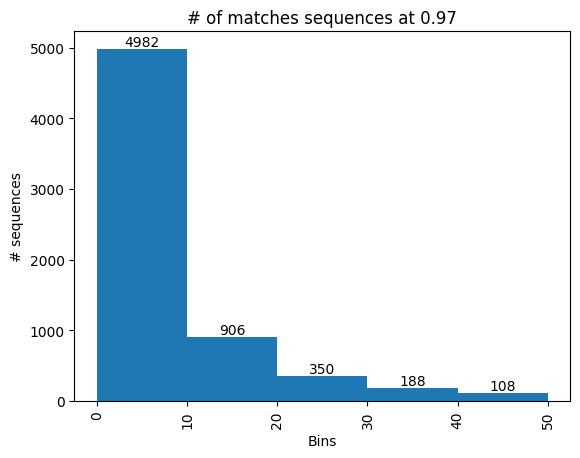

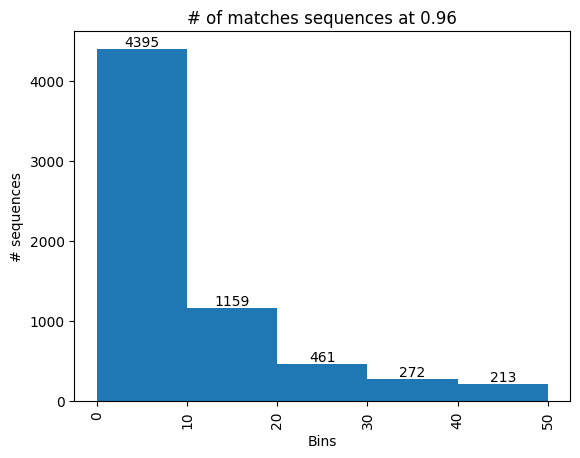

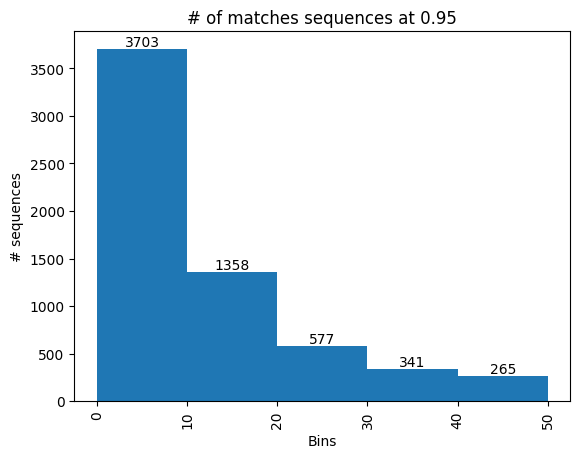

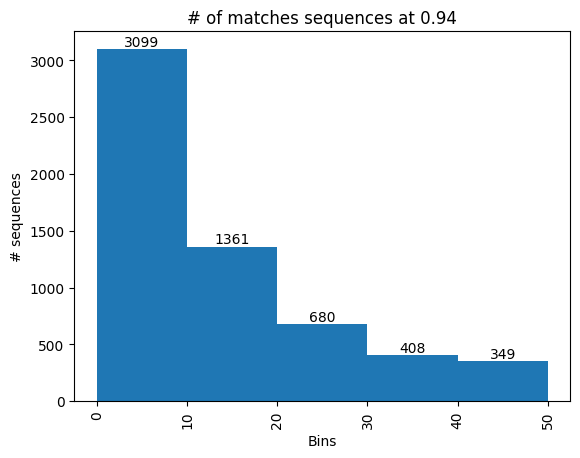

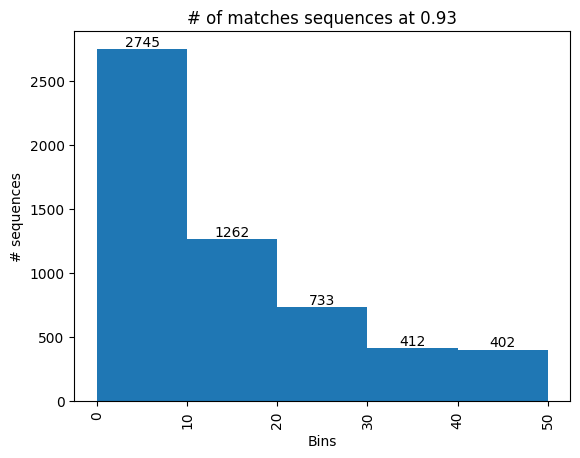

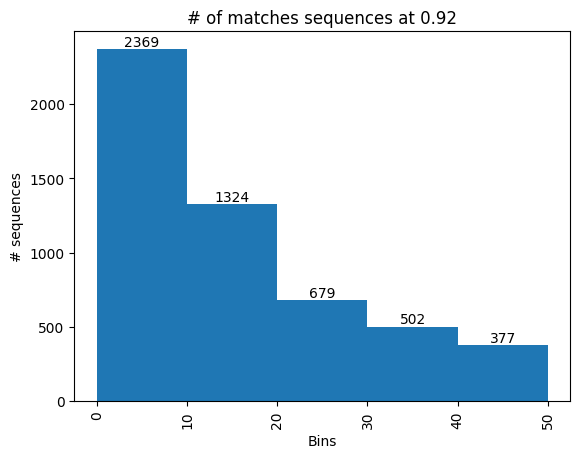

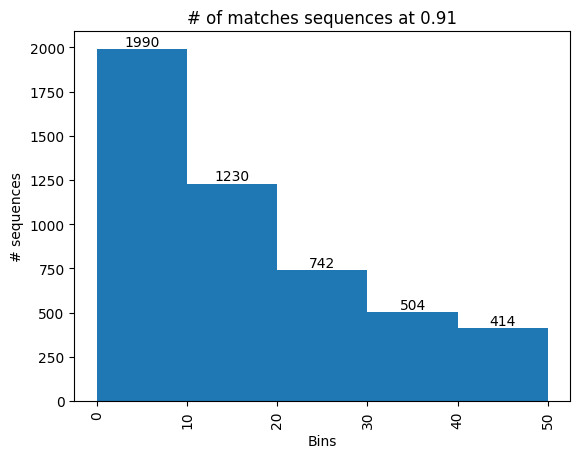

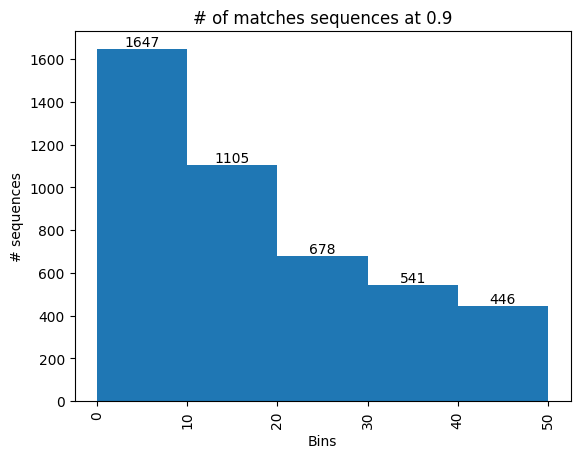

In [17]:
import matplotlib.pyplot as plt
from numpy import linspace

for threshold, threshold_matches in matches.items():
    thresh = round(float(threshold), 2)
    values = list([len(x) for x in threshold_matches.values()])
    counts, bin_edges, patches = plt.hist(values, bins = linspace(0, 50, 6))  # 6 edges = 5 bins)

    # Annotate counts above each bar
    for count, edge_left, edge_right in zip(counts, bin_edges[:-1], bin_edges[1:]):
        bar_center = (edge_left + edge_right) / 2
        plt.text(bar_center, count, str(int(count)), ha='center', va='bottom', fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Bins')
    plt.ylabel('# sequences')
    plt.title(f'# of matches sequences at {thresh}')
    plt.savefig(f"{thresh}_match_distribution.png")
    plt.show()

## acquire the RefSeq IDs

## processing the statistics of the matches

In [25]:
from pandas import DataFrame
import json

matches = json.load(open("matches.json", "r"))
len_matches = {}
for threshold, matchs in matches.items():
    threshold = float(threshold)
    len_matches[threshold] = {seqID: len(sequences) for seqID, sequences in matchs.items()}
    
df = DataFrame(len_matches)
display(df)
# for col in df.columns:
#     df[col] = df[col].apply(len)
# display(df)


,1.00,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90
2d8d5004dc994f9afa3a48bc723b650b,1.0,1.0,1.0,2.0,11.0,18.0,25.0,29.0,30.0,30.0,30
f8c9c4f42f6641d5e0f5b67ff8bb8964,1.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,8.0,16
8466c6dfab56e8746ea47bc3c0e571e0,1.0,1.0,5.0,9.0,12.0,25.0,57.0,104.0,125.0,135.0,141
3650c400f224650eba1d59c8807f6a87,1.0,1.0,3.0,3.0,14.0,24.0,46.0,148.0,261.0,320.0,413
b007ee8271fbffb0cfc43075ab8741c6,1.0,4.0,8.0,11.0,32.0,90.0,224.0,339.0,399.0,428.0,439
...,...,...,...,...,...,...,...,...,...,...,...
e9a2f56335ac461e54ad5d119f7a2847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7f10ca244f4ef34386c0d00de7344d85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
425c6050bd88a2347c8d7bcc10e56756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
633768db5b5da8d75a7f3fca0310020b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [18]:
df.loc["2d8d5004dc994f9afa3a48bc723b650b", "1.0"]

['TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGAGCCCGCAGGCGGCTTGGCAAGTTTCGAGTGAAATCTCCCGGCTCAACTGGGAGGGCGCTCGGAAAACTGCCAGGCTTGAGGCAGGGAGAGGGATGTGGAATTCCCGGTGTAGTGGTGAAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCATCCTGGCCCTGTCCTGACGCTCAGGGGCGAAAGCGTGGGGAGCAAACCGGATTAGATACCCGGGTAGTCCACGCCGTAAACGATGAGTACTAGGTGTAGGGGGTATCGACCCCCTCTGTGCCGAAGCTAACGCGATAAGTACTCCGCCTGGGGACTACGGCCGCAAGGCTA']

## pulling all of the IDs for the provided taxa

In [ ]:
# get the UIDs for all sequences
search_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
params = {
    "db": "assembly",
    "retmax": "100000",
    "retmode": "json"
}

def get_uids(taxa):
    genus = taxa["genus"].replace("_", " ").replace("Ca", "Candidatus")
    species = taxa["species"].replace("_", " ").replace("Ca", "Candidatus")
    if "midas" in species: params.update({"term": f"{genus}[Organism]"})
    else: params.update({"term": f"{genus}+{species}[Organism]"})
    return requests.get(search_url, params=params).json()["esearchresult"]["idlist"]

# get the assemblies for all UIDs
def get_accessions(batch):
    summary_params = {
        "db": "assembly",
        "id": ",".join(batch),
        "retmode": "json"
    }
    summaries = requests.get(summary_url, params=summary_params).json()["result"]
    accessions = []
    for uid in batch:
        record = summaries[uid]
        accessions.append({
            "accession": record["assemblyaccession"],
            "organism": record["organism"],
            "taxid": record["taxid"]
        })
    return accessions

from numpy import array_split, ceil
from itertools import chain

matches = json.load(open("matches.json", "r"))

uids = list(chain.from_iterable([get_uids(midas_taxonomy[seq]) for seq in df.index]))
num_batches = ceil(len(uids)/500)
all_accessions = list(chain.from_iterable([get_accessions(batch) for batch in array_split(uids, num_batches)]))

# abundance exploration

In [ ]:
from tarfile import data_filter
from pandas import read_excel

abundances = read_excel("../../sludge/data/GAME Sequencing/ASV_Abundance.xlsx").set_index("seq")

print("zero everywhere", len(abundances[abundances.sum(axis=1) == 0]), end="\n\n")

for col in abundances.columns:
    print(col)
    data_filter = abundances[col]
    print("max", data_filter.max())
    print("all", len(data_filter))
    print("non-zero", len(data_filter[data_filter > 0]))
    print(".1%", len(data_filter[data_filter > .1]))
    print(".5%", len(data_filter[data_filter > .5]))
    print()

zero everywhere 0

1AB
max 29.2079806529625
all 686
non-zero 157
.1% 96
.5% 23

2AB
max 7.59896558583648
all 686
non-zero 336
.1% 192
.5% 44

3AB
max 60.9952606635071
all 686
non-zero 80
.1% 31
.5% 14

4AB
max 20.6989057536181
all 686
non-zero 27
.1% 17
.5% 10

5AB
max 57.1428571428571
all 686
non-zero 2
.1% 2
.5% 2

6AB
max 43.2195975503062
all 686
non-zero 25
.1% 25
.5% 19

7AB
max 12.0695391781733
all 686
non-zero 322
.1% 189
.5% 43

